This notebook will take the each stem and lemmatized data set; countvectorize and tf-idf then run through logistic regression model.

In [5]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# import custom stop words
from customstopwords import custom_stop_words_all

In [3]:
# read in data files
df_lem = pd.read_csv('../CommentFiles/Comments_EDA_lem.csv')
df_stem = pd.read_csv('../CommentFiles/Comments_EDA_stem.csv')

In [4]:
# convert subreddit into binary labels
df_lem['subreddit'] = df_lem['subreddit'].map({'sportsbook': 1, 'dfsports': 0})
# convert subreddit into binary labels
df_stem['subreddit'] = df_stem['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

Hidden cells are functions that output scores and reports for label data sets and transformers.

In [45]:
# create function to transform and classify 
def transform_classify_cvec(df, name):

    # set X , y
    X = df['body']
    y = df['subreddit']

    #TTS
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    # Instantiate CountVectorizer
    cvec = CountVectorizer(stop_words=custom_stop_words_all)

    # Fit and transform data sets
    X_train_cvec = cvec.fit_transform(X_train.astype(str))
    # transform test data
    X_test_cvec = cvec.transform(X_test.astype(str))

    # model using logistic regression
    logreg = LogisticRegression()

    # fit model to countvectorized data sets
    logreg.fit(X_train_cvec, y_train)

    # print scores and metrics
    # score train and test
    print(name)
    print('')
    print('Train Score    : ', logreg.score(X_train_cvec, y_train))
    print('Test Score     : ', logreg.score(X_test_cvec, y_test))
    print('Cross Val Score: ', cross_val_score(logreg, X_train_cvec, y_train, cv=5).mean())
    print('Accuracy Score : ', accuracy_score(y_test, logreg.predict(X_test_cvec)))
    print('')
    # print and plot confusion matrix
    cm = confusion_matrix(y_test, logreg.predict(X_test_cvec))
    ConfusionMatrixDisplay(cm, display_labels=['sportsbook', 'dfsports']).plot();
    print('')
    # print classification report
    print(classification_report(y_test, logreg.predict(X_test_cvec)))
    pass

In [46]:
# create function to transform and classify 
def transform_classify_tvec(df, name):

    # set X , y
    X = df['body']
    y = df['subreddit']

    #TTS
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    # Instantiate CountVectorizer
    tvec = TfidfVectorizer(stop_words=custom_stop_words_all)

    # Fit and transform data sets
    X_train_tvec = tvec.fit_transform(X_train.astype(str))
    # transform test data
    X_test_tvec = tvec.transform(X_test.astype(str))

    # model using logistic regression
    logreg = LogisticRegression()

    # fit model to countvectorized data sets
    logreg.fit(X_train_tvec, y_train)

    # print scores and metrics
    # score train and test
    print(name)
    print('')
    print('Train Score    : ', logreg.score(X_train_tvec, y_train))
    print('Test Score     : ', logreg.score(X_test_tvec, y_test))
    print('Cross Val Score: ', cross_val_score(logreg, X_train_cvec, y_train, cv=5).mean())
    print('Accuracy Score : ', accuracy_score(y_test, logreg.predict(X_test_tvec)))
    print('')
    # print and plot confusion matrix
    cm = confusion_matrix(y_test, logreg.predict(X_test_tvec))
    ConfusionMatrixDisplay(cm, display_labels=['sportsbook', 'dfsports']).plot();
    print('')
    # print classification report
    print(classification_report(y_test, logreg.predict(X_test_tvec)))
    pass

Lemmatized, CountVectorized

Train Score    :  0.9483418367346939
Test Score     :  0.8304652644996813
Cross Val Score:  0.8227040043412395
Accuracy Score :  0.8304652644996813


              precision    recall  f1-score   support

           0       0.86      0.79      0.82       777
           1       0.81      0.87      0.84       792

    accuracy                           0.83      1569
   macro avg       0.83      0.83      0.83      1569
weighted avg       0.83      0.83      0.83      1569



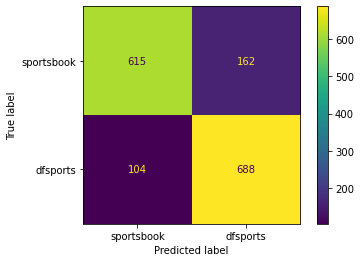

In [49]:
transform_classify_cvec(df_lem, 'Lemmatized, CountVectorized')

## Annotation:
The lemmatized words and the addition of the stop words made little impact on the scores.  The testing score increased slightly and the training score decreased slightly closing the gap between the two.  
Overall accuracy improved slightly; with and increase in sensitivity and decrease in specificity.  Still the model's effectiveness at predicting sportsbook correctly is less than overall accuracy.

Lemmatized, TF-IDF

Train Score    :  0.9298469387755102
Test Score     :  0.8336520076481836
Cross Val Score:  0.5163703167748208
Accuracy Score :  0.8336520076481836


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       790
           1       0.82      0.86      0.84       779

    accuracy                           0.83      1569
   macro avg       0.83      0.83      0.83      1569
weighted avg       0.83      0.83      0.83      1569



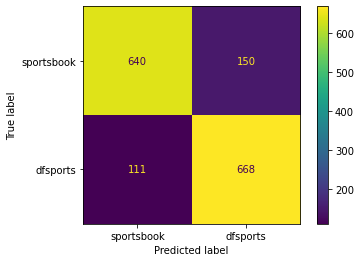

In [48]:
transform_classify_tvec(df_lem, 'Lemmatized, TF-IDF')

## Annotation:
The TD-IDF tranformer did not return a better model.  Very similar scores to count vectorizer with logistic regression.  Going forward different estimators will be used and gridsearch to pick most effective parameters for these transformers.

Stemed CountVectorize

Train Score    :  0.9438775510204082
Test Score     :  0.8483110261312938
Cross Val Score:  0.8182388586157778
Accuracy Score :  0.8483110261312938


              precision    recall  f1-score   support

           0       0.90      0.79      0.84       804
           1       0.81      0.91      0.85       765

    accuracy                           0.85      1569
   macro avg       0.85      0.85      0.85      1569
weighted avg       0.85      0.85      0.85      1569



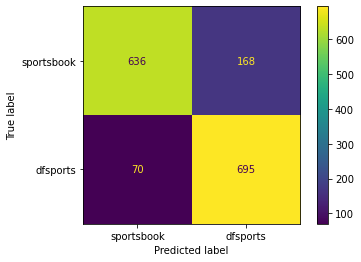

In [51]:
transform_classify_cvec(df_stem, 'Stemed CountVectorize')

## Annotation:
The stemmed words and the addition of the stop words made little impact on the scores.  The testing score increased slightly and the training score decreased slightly closing the gap between the two.  
Overall accuracy improved slightly; with and increase in sensitivity and decrease in specificity.  Still the model's effectiveness at predicting sportsbook correctly is less than overall accuracy.

Stemmed TF-IDF

Train Score    :  0.9292091836734694
Test Score     :  0.8406628425748884
Cross Val Score:  0.5061607163045199
Accuracy Score :  0.8406628425748884


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       759
           1       0.84      0.86      0.85       810

    accuracy                           0.84      1569
   macro avg       0.84      0.84      0.84      1569
weighted avg       0.84      0.84      0.84      1569



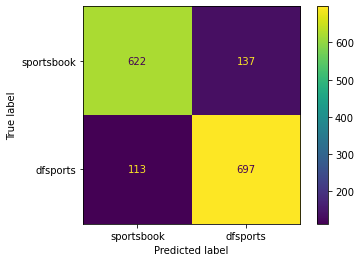

In [52]:
transform_classify_tvec(df_stem, 'Stemmed ')

## Annotation:
The TD-IDF tranformer did not return a better model.  Very similar scores to count vectorizer with logistic regression.  Going forward different estimators will be used and gridsearch to pick most effective parameters for these transformers.